In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
np.random.seed(42)


# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

def save_fig(fig_id, tight_layout=True):
    path = os.path.join("FTKToyPlots", fig_id + ".pdf")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='pdf', dpi=300)

# Some helper functions

In [2]:
# Note there are 2 different phis used:
#   - phi_circle (the angle of the center of the circle in r-phi plane)
#   - phi_track (the direction of the particle that made the track) 
#
#  For positive tracks: phi_circle = phi_track - pi/2
#  For negative tracks: phi_circle = phi_track + pi/2
from TrackHelper import getPhiCircle
from TrackHelper import drawTrack


# Now Detector Classes

simple Detector geo is the phi symmetric detector geometry

In [3]:
from simpleDetectorGeo import simpleDetectorGeo

# Define the detector geometry (no modules yet)

Saving figure SymmetricDetector


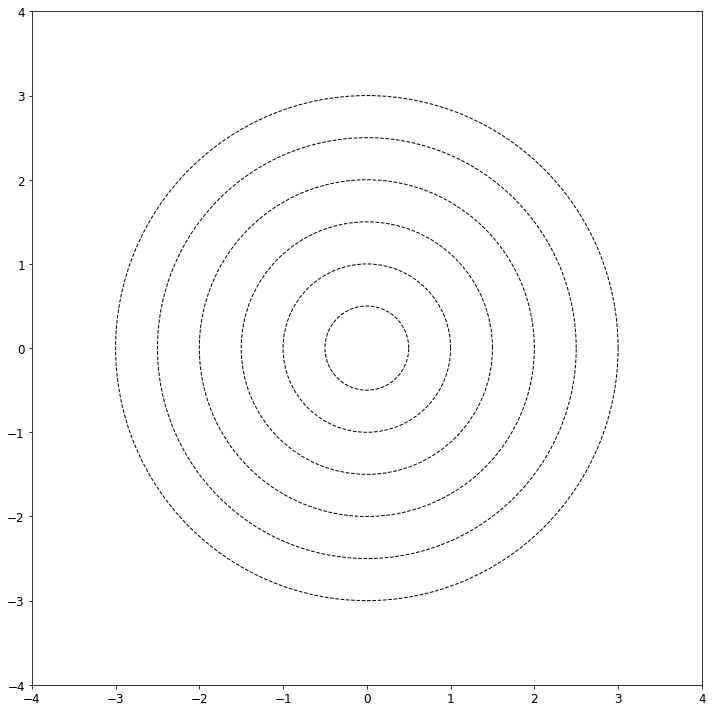

In [4]:
rDet = np.array([0.5, 1.0, 1.5, 2, 2.5,3.0])
fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 4
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))


detGeo = simpleDetectorGeo(rDet)
detGeo.drawDetector(ax)
save_fig("SymmetricDetector")

# Make some Towers

OK move to a phi slice and start with FTK. Lets draw the SSIDs

Saving figure SymmetricTower


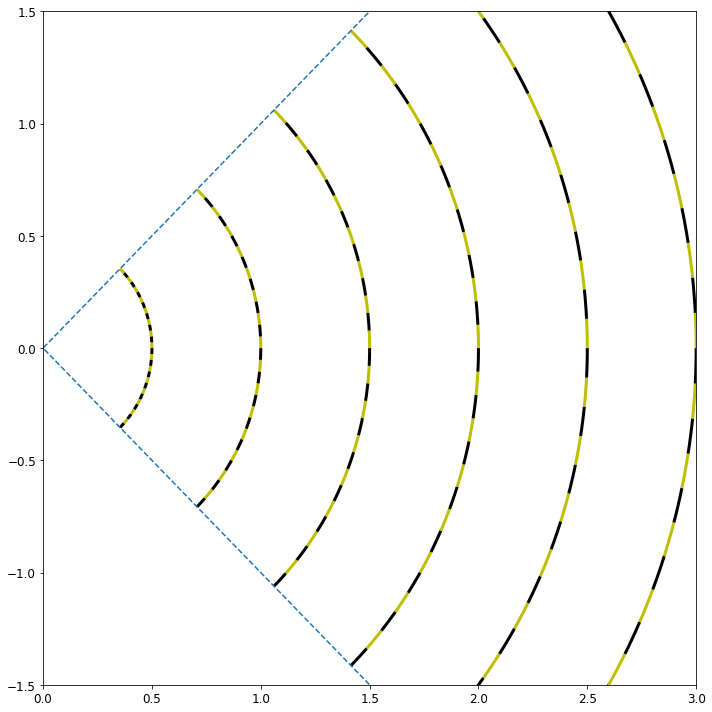

In [5]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.set_xlim((0, 3))
ax.set_ylim((-1.5, 1.5))
nSSperLayer=[30,30,30,30,30,30]


detGeo.makeTower(0*np.pi/12,  np.pi/2, nSS=nSSperLayer)
detGeo.drawTower(ax,detailed=True)
save_fig("SymmetricTower")

# Get sometracks for pattern matching

In [6]:
np.random.seed(42)


solutions_test  = []

phiRange = (-3*np.pi/12, 3*np.pi/12)


for trkI in range(10):
    
    ptInv = np.random.uniform(0.01,0.5,1)[0]
    phi   = np.random.uniform(phiRange[0],phiRange[1],1)[0]
    q     = 2*np.random.randint(0,2,1)[0]-1
    pt = 1./ptInv

    xHits, yHits, layers, becs = detGeo.getHits(pt,phi,q)

    solutions_test.append([xHits,yHits,pt,phi,q])


/Users/johnda/MachineLearning/TrackingToy/simpleLayer.py:79: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_pp = abs(yints_raw-trk_yc+np.sqrt(trk_rc2-(xints_p_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/simpleLayer.py:80: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_pm = abs(yints_raw-trk_yc-np.sqrt(trk_rc2-(xints_p_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/simpleLayer.py:81: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_mp = abs(yints_raw-trk_yc+np.sqrt(trk_rc2-(xints_m_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/simpleLayer.py:82: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_mm = abs(yints_raw-trk_yc-np.sqrt(trk_rc2-(xints_m_raw-trk_xc)**2))


# Lets plot the SSIDs that are Hit as a sanity check

Saving figure SymmetricTowerWithOneTrack


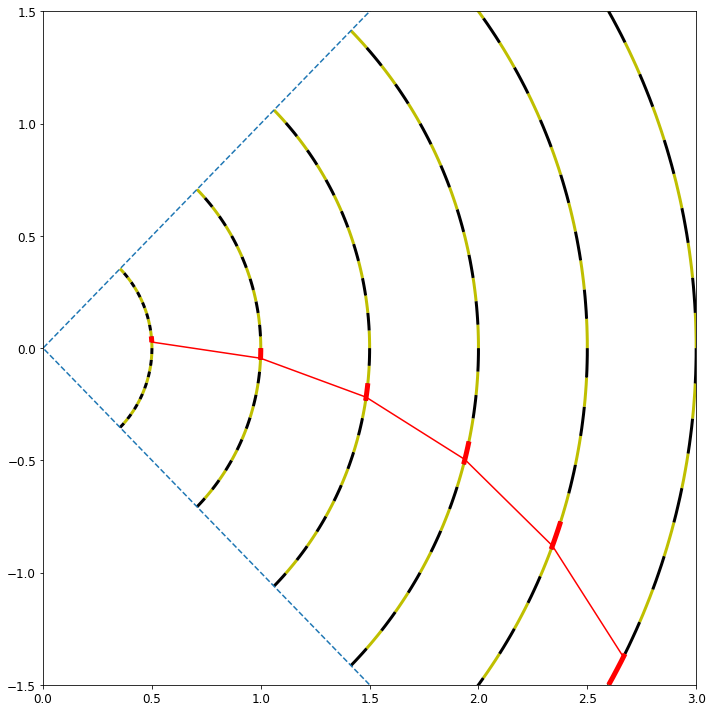

In [7]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.set_xlim((0, 3))
ax.set_ylim((-1.5, 1.5))

detGeo.drawTower(ax,detailed=True)
for sItr in range(2):
    s = solutions_test[sItr]

    hitList = []
    for hItr in range(len(s[0])):
        # Layer / hit-X / hit-Y
        hitList.append([1,s[0][hItr],s[1][hItr],hItr])
        
    if not detGeo.hitsAllInTower(hitList): continue
    
    color = "b" if (s[4] < 0) else "r"
    plt.plot(s[0],s[1],color)
        
    hitsWithSSIDs = detGeo.addSSIDs(hitList)

    thisSSIDs = np.array(hitsWithSSIDs)
    thisSSIDs = np.delete(hitsWithSSIDs,0,axis=1)
    thisSSIDs = np.delete(thisSSIDs,0,axis=1)    
    thisSSIDs = np.delete(thisSSIDs,0,axis=1)        

    detGeo.drawSSIDs(ax,thisSSIDs)





save_fig("SymmetricTowerWithOneTrack")

# OK Lets make some patterns 

Function to assign list of SSids a unique number (patternID)

In [8]:
from TrackHelper import patternID


In [9]:
import os
import pickle
if os.path.isfile("patternsSymmetric2DGeo_75k.pickle"):
    print("Loading Patterns")
    with open('patternsSymmetric2DGeo_75k.pickle', 'rb') as handle:
        patternsBankLoaded = pickle.load(handle)
    
    patternBank         = patternsBankLoaded["bank"]
    passedTracksSamples = patternsBankLoaded["passedTracks"]
    patternBankSize     = patternsBankLoaded["bankSize"]


else:
    print("Making Patterns")
    np.random.seed(42)

    nTrk_pattGen = int(7.5e4)#int(7.5e2)
    solutions_pattGen  = []    

    phiRange = (-3*np.pi/12, 3*np.pi/12)

    for trkI in range(nTrk_pattGen):
        
        ptInv = np.random.uniform(0.01,0.5,1)[0]
        phi   = np.random.uniform(phiRange[0],phiRange[1],1)[0]
        q     = 2*np.random.randint(0,2,1)[0]-1
        pt = 1./ptInv
        
        xHits, yHits, layers, becs = detGeo.getHits(pt,phi,q)
        
        solutions_pattGen.append([xHits,yHits,pt,phi,q])
    
    
    # The pattern bank
    patternBank = {}
    
    # For plotting
    passedTracks = 0
    passedTracksSamples = np.array([],float)
    patternBankSize = np.array([],float)
    
    for sItr in range(nTrk_pattGen):
        s = solutions_pattGen[sItr]
        
        hitList = []
        for hItr in range(len(s[0])):
            # hitITr / Layer / hit-X / hit-Y
            hitList.append([1,s[0][hItr],s[1][hItr],hItr])
            
        if not detGeo.hitsAllInTower(hitList): continue

        passedTracks += 1
        
        hitsWithSSIDs = detGeo.addSSIDs(hitList)
        
        # Get SSIds perlayer
        thisSSIDs = [] 
        for _ in range(len(rDet)): thisSSIDs.append([])
            
        for hinfo in hitsWithSSIDs:
            layer = int(hinfo[3])
            thisSSIDs[layer].append(hinfo[4])
            
        
        #
        #  Need one SSIDS per layer
        #        
        for layItr, layerSSIDs in enumerate(thisSSIDs):
            if len(layerSSIDs) == 0:  
                print("Skipping training track")
            elif len(layerSSIDs) == 1:  
                pass # all good
            else:
                while(not len(thisSSIDs[layItr]) == 1):
                    thisSSIDs[layItr].pop(-1)

        thisPatternID = patternID(thisSSIDs,nSSperLayer)
        
        if thisPatternID not in patternBank:
            patternBank[thisPatternID] = 0
        
        patternBank[thisPatternID] += 1
        
        # Statistics
        if passedTracks %10 == 0:
            passedTracksSamples = np.append(passedTracksSamples,passedTracks)
            patternBankSize     = np.append(patternBankSize, len(patternBank))
            
    patternsBankToLoad = {}
    patternsBankToLoad["bank"]         = patternBank
    patternsBankToLoad["passedTracks"] = passedTracksSamples
    patternsBankToLoad["bankSize"]     = patternBankSize
    
    with open('patternsSymmetric2DGeo_75k.pickle', 'wb') as handle:
        pickle.dump(patternsBankToLoad, handle, protocol=pickle.HIGHEST_PROTOCOL)  
    
len(patternBank)

Loading Patterns


3137

Saving figure PatternsVsTracks


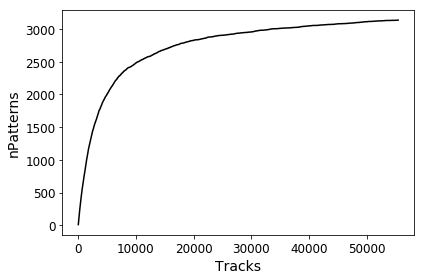

In [10]:
plt.plot(passedTracksSamples,patternBankSize,"k")
plt.xlabel("Tracks")
plt.ylabel("nPatterns")
save_fig("PatternsVsTracks")

Looks like we are definitely getting diminishing returns with 500k tracks

# Some thoughts on pattern back compression

Allowing arbtritray combinations of SSIDs is clearly overkill
Valid track combinations make up a tiny fraction of total possibilities

In [11]:
print(len(patternBank)/(25**6))
print(25**6/1e6)

1.2849152e-05
244.140625


In [12]:
# Unique SSIDs in Pairs
pairs01 = {}
pairs02 = {}
pairs03 = {}
pairs04 = {}
pairs05 = {}

pairs12 = {}
pairs13 = {}
pairs14 = {}
pairs15 = {}

pairs23 = {}
pairs24 = {}
pairs25 = {}

pairs34 = {}
pairs35 = {}

pairs45 = {}


# Unique pairs of 2Layer codes
pairs0123 = {}
pairs0145 = {}

pairs2345 = {}

pairs012345 = {}

def addComb(code,combs):
    if code not in combs: 
        combs[code] = 0
    combs[code] += 1

for patt in patternBank:
    # Extract SSIDs at layer level
    ssID0 = int((patt / 100**0)) % 100
    ssID1 = int((patt / 100**1)) % 100
    ssID2 = int((patt / 100**2)) % 100    
    ssID3 = int((patt / 100**3)) % 100    
    ssID4 = int((patt / 100**4)) % 100    
    ssID5 = int((patt / 100**5)) % 100        
    

    #print(patt,ssID0,ssID1)
    code01 = 100*ssID1+ssID0
    code02 = 100*ssID2+ssID0
    code03 = 100*ssID3+ssID0
    code04 = 100*ssID4+ssID0
    code05 = 100*ssID5+ssID0    


    code12 = 100*ssID2+ssID1
    code13 = 100*ssID3+ssID1
    code14 = 100*ssID4+ssID1
    code15 = 100*ssID5+ssID1  
    
    code23 = 100*ssID3+ssID2
    code24 = 100*ssID4+ssID2
    code25 = 100*ssID5+ssID2  
    
    code34 = 100*ssID4+ssID3
    code35 = 100*ssID5+ssID3  
    
    code45 = 100*ssID5+ssID4  

    code0123 = 100**2*code23 + code01
    code0145 = 100**2*code45 + code01    
    
    code2345 = 100**2*code45 + code23    
    
    code012345 = 100**2*code2345 + code01        
    
    if not patt == code012345:
        print(patt,code012345,code0123,code01,ssID0)
    
    addComb(code01,pairs01)
    addComb(code02,pairs02)    
    addComb(code03,pairs03)    
    addComb(code04,pairs04)    
    addComb(code05,pairs05)    
    
    addComb(code12,pairs12)    
    addComb(code13,pairs13)    
    addComb(code14,pairs14)   
    addComb(code15,pairs15)
    
    addComb(code23,pairs23)    
    addComb(code24,pairs24)   
    addComb(code25,pairs25)
    
    addComb(code34,pairs34)   
    addComb(code35,pairs35)

    addComb(code45,pairs45)    
    
    
    addComb(code0123,pairs0123)   
    addComb(code0145,pairs0145)
    
    addComb(code2345,pairs2345)
    
    addComb(code012345,pairs012345)


def printFrac(pairs,possible=25**2):
    print(len(pairs),"frac",len(pairs)/possible)

print("Layer 0 with:")
printFrac(pairs01)
printFrac(pairs02)
printFrac(pairs03)
printFrac(pairs04)
printFrac(pairs05)

print("Layer 1 with:")
printFrac(pairs12)
printFrac(pairs13)
printFrac(pairs14)
printFrac(pairs15)

print("Layer 2 with:")
printFrac(pairs23)
printFrac(pairs24)
printFrac(pairs25)

print("Layer 3 with:")
printFrac(pairs34)
printFrac(pairs35)

print("Layer 4 with:")
printFrac(pairs45)


print("2 Layerpairs 01 with:")
printFrac(pairs0123,100**2)
printFrac(pairs0145,100**2)

print("2 Layerpairs 23 with:")
printFrac(pairs2345,100**2)

print("4 Layerpairs 0123 with 45:")
printFrac(pairs012345,1000*100)

Layer 0 with:
167 frac 0.2672
265 frac 0.424
391 frac 0.6256
516 frac 0.8256
636 frac 1.0176
Layer 1 with:
169 frac 0.2704
288 frac 0.4608
398 frac 0.6368
541 frac 0.8656
Layer 2 with:
170 frac 0.272
296 frac 0.4736
419 frac 0.6704
Layer 3 with:
170 frac 0.272
321 frac 0.5136
Layer 4 with:
198 frac 0.3168
2 Layerpairs 01 with:
920 frac 0.092
1939 frac 0.1939
2 Layerpairs 23 with:
1075 frac 0.1075
4 Layerpairs 0123 with 45:
3137 frac 0.03137


In [13]:
(0.26*0.2675*0.3) * 0.0594 *0.02013

2.4948739529999995e-05

In [14]:
len(patternBank)/(25**6)

1.2849152e-05

In [15]:
0.26**3*0.0594

0.0010440144000000001

# OK Lets try to do pattern matching with the pattern bank

Make an event with tracks

In [16]:
def getEvent(nTrks, phiCenter, phiWidth, det_geo, randSeed = 42, debug=False):
    np.random.seed(randSeed)

    # Kaggle formats
    eventParticles = []
    eventTruth = []
    eventHits = []

    # For plotting 
    solutions = []
    
    hitID = 0
    trkID = 0
    phiRange = (phiCenter-phiWidth/2, phiCenter+phiWidth/2)

    if debug: print("phiRange is",phiRange)
    nTrkPerPhiRegion = int(10) # with 50 tracks total ~10 in a phi slice
    for trkI in range(nTrks):
        ptInv = np.random.uniform(0.01,0.5,1)[0]
        phi   = np.random.uniform(phiRange[0],phiRange[1],1)[0]
        q     = 2*np.random.randint(0,2,1)[0]-1
        pt = 1./ptInv

        xHits, yHits, layers, becs = det_geo.getHits(pt,phi,q)

        hitList = []
        for hItr in range(len(xHits)):
            # Layer / hit-X / hit-Y
            hitList.append((hItr,xHits[hItr],yHits[hItr]))

        if not det_geo.hitsAllInTower(hitList): 
            if debug: print("Skipping",phi)
            continue

        trkID += 1
        eventParticles.append((trkI,pt,phi,q,6))
        solutions.append([xHits,yHits,pt,phi,q])
        for hitItr in range(len(xHits)):
            # hit_id, particle_id, tx, ty, tz, weight (=1 for now)
            eventTruth.append([hitID,trkID,xHits[hitItr],yHits[hitItr],1.0])
            eventHits .append([hitID,xHits[hitItr],yHits[hitItr],hitItr])        
            hitID += 1


    recHits = np.array(eventHits)
    shuffle_index = np.random.permutation(len(recHits))
    recHits = recHits[shuffle_index]

    return recHits, eventTruth, eventParticles, solutions

In [17]:
recHits, eventTruth, eventPartilces, solutions = getEvent(10, 0, np.pi/4, detGeo)

recHits[0:10] 

/Users/johnda/MachineLearning/TrackingToy/simpleLayer.py:81: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_mp = abs(yints_raw-trk_yc+np.sqrt(trk_rc2-(xints_m_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/simpleLayer.py:82: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_mm = abs(yints_raw-trk_yc-np.sqrt(trk_rc2-(xints_m_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/simpleLayer.py:79: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_pp = abs(yints_raw-trk_yc+np.sqrt(trk_rc2-(xints_p_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/simpleLayer.py:80: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_pm = abs(yints_raw-trk_yc-np.sqrt(trk_rc2-(xints_p_raw-trk_xc)**2))


array([[ 4.        ,  2.06570802,  1.4081372 ,  4.        ],
       [37.        ,  0.93310101, -0.35961439,  1.        ],
       [10.        ,  2.26602173, -1.05600451,  4.        ],
       [ 0.        ,  0.46006378,  0.1958094 ,  0.        ],
       [35.        ,  2.86233602, -0.89834989,  5.        ],
       [32.        ,  1.4609364 , -0.34009533,  2.        ],
       [28.        ,  2.3535703 ,  0.8430343 ,  4.        ],
       [12.        ,  0.46639989, -0.18019751,  0.        ],
       [23.        ,  2.99955708, -0.0515491 ,  5.        ],
       [29.        ,  2.82933071,  0.9974406 ,  5.        ]])

Lets draw extract the input hits and draw the solutions 

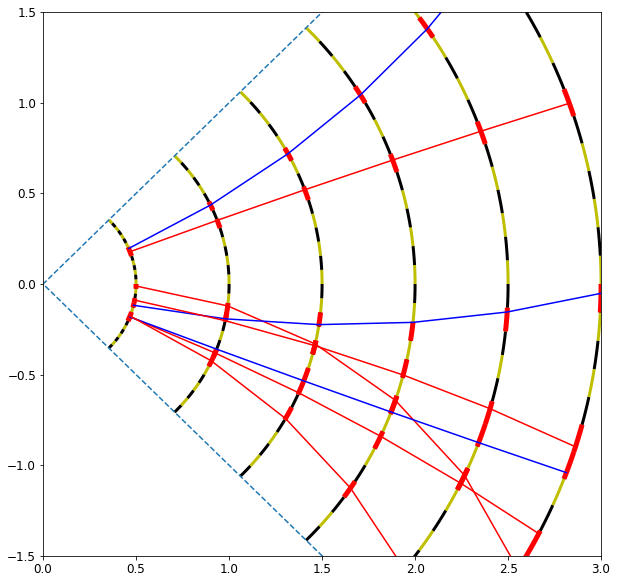

In [18]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.set_xlim((0, 3))
ax.set_ylim((-1.5, 1.5))

detGeo.drawTower(ax,detailed=True)
for sItr in range(len(solutions)):
    s = solutions[sItr]

    hitListTrk = []
    for hItr in range(len(s[0])):
        # Layer / hit-X / hit-Y
        hitListTrk  .append([1,s[0][hItr],s[1][hItr],hItr])

    color = "b" if (s[4] < 0) else "r"
    plt.plot(s[0],s[1],color)
    
    hitsWithSSIDs = detGeo.addSSIDs(hitListTrk)

    thisSSIDs = np.array(hitsWithSSIDs)
    thisSSIDs = np.delete(thisSSIDs,0,axis=1)
    thisSSIDs = np.delete(thisSSIDs,0,axis=1)  
    thisSSIDs = np.delete(thisSSIDs,0,axis=1)      

    detGeo.drawSSIDs(ax,thisSSIDs)



OK now loop over hits get SSIDS and match patterns

In [19]:
#print(recHits)
hitsAndSSIDS = detGeo.addSSIDs(recHits)
#print(hitsAndSSIDS)
detGeo.DOWrite(hitsAndSSIDS)




In [20]:
patterns = patternBank.keys()
matchedPatterns = []
for p in patterns:

    if detGeo.isPatternFired(p): 
        matchedPatterns.append(p)

print(matchedPatterns)

[272625242322.0, 50606070708.0, 90808070707.0, 90808080707.0, 90908080707.0, 212121212122.0, 212121212121.0, 40608101214.0, 90910101111.0, 103050608.0, 50606070707.0, 272625242321.0, 80910101111.0, 141312121110.0, 80808080707.0, 80808070707.0, 141312121111.0, 103050708.0, 50608101214.0]


In [21]:
from TrackHelper import getSSIDS

272625242322.0
[(0, 22), (1, 23), (2, 24), (3, 25), (4, 26), (5, 27)]
50606070708.0
[(0, 8), (1, 7), (2, 7), (3, 6), (4, 6), (5, 5)]
90808070707.0
[(0, 7), (1, 7), (2, 7), (3, 8), (4, 8), (5, 9)]
90808080707.0
[(0, 7), (1, 7), (2, 8), (3, 8), (4, 8), (5, 9)]
90908080707.0
[(0, 7), (1, 7), (2, 8), (3, 8), (4, 9), (5, 9)]
212121212122.0
[(0, 22), (1, 21), (2, 21), (3, 21), (4, 21), (5, 21)]
212121212121.0
[(0, 21), (1, 21), (2, 21), (3, 21), (4, 21), (5, 21)]
40608101214.0
[(0, 14), (1, 12), (2, 10), (3, 8), (4, 6), (5, 4)]
90910101111.0
[(0, 11), (1, 11), (2, 10), (3, 10), (4, 9), (5, 9)]
103050608.0
[(0, 8), (1, 6), (2, 5), (3, 3), (4, 1), (5, 0)]
50606070707.0
[(0, 7), (1, 7), (2, 7), (3, 6), (4, 6), (5, 5)]
272625242321.0
[(0, 21), (1, 23), (2, 24), (3, 25), (4, 26), (5, 27)]
80910101111.0
[(0, 11), (1, 11), (2, 10), (3, 10), (4, 9), (5, 8)]
141312121110.0
[(0, 10), (1, 11), (2, 12), (3, 12), (4, 13), (5, 14)]
80808080707.0
[(0, 7), (1, 7), (2, 8), (3, 8), (4, 8), (5, 8)]
80808070707

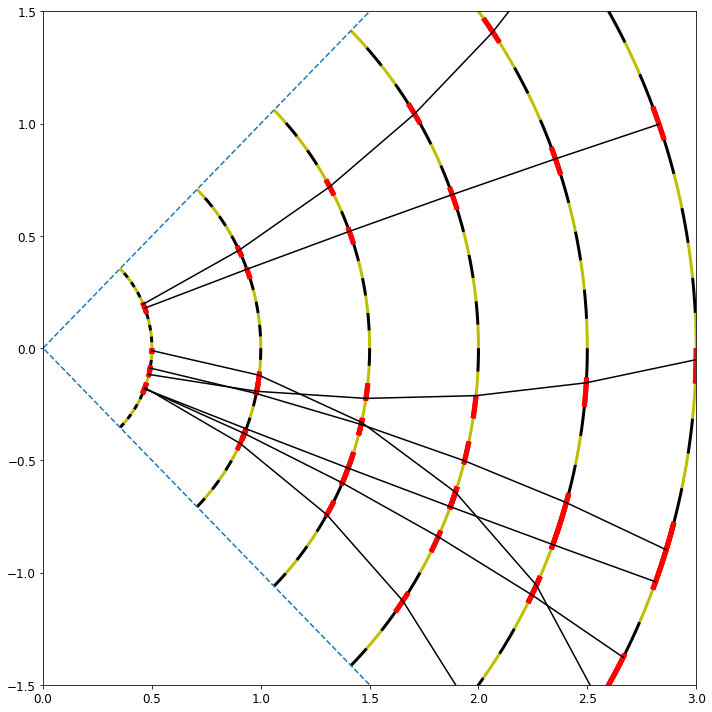

In [22]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.set_xlim((0, 3))
ax.set_ylim((-1.5, 1.5))


detGeo.drawTower(ax,detailed=True)
for mp in matchedPatterns:
    print(mp)            
    thisSSIDs = getSSIDS(mp)
    print(thisSSIDs)
    detGeo.drawSSIDs(ax,thisSSIDs)
    
for sItr in range(len(solutions)):
    s = solutions[sItr]

    color = "k"
    plt.plot(s[0],s[1],color)
    
save_fig("MatchedPatternsPhi0")

THis looks reasonable. Lets score it with the kaggle metric.

# Get the truth and reco in the right format and then score the result

In [23]:
solns, _  = detGeo.getSolutions(matchedPatterns)
solns.head()
solns

event_id  hit_id  track_id
0          0     0.0         1
1          0     1.0         1
2          0     2.0         1
3          0     3.0         1
4          0     4.0         1
5          0     5.0         1
6          0    42.0         2
7          0    37.0         2
8          0    13.0         2
9          0    14.0         2
10         0    15.0         2
11         0    10.0         2
12         0    16.0         2
13         0    17.0         2
14         0    12.0         3
15         0    36.0         3
16         0     9.0         3
17         0    39.0         3
18         0    40.0         3
19         0    35.0         3
20         0    25.0         6
21         0    26.0         6
22         0    27.0         6
23         0    28.0         6
24         0    29.0         6
25         0     6.0         8
26         0     7.0         8
27         0    32.0         8
28         0     8.0         8
29         0    11.0         8
30         0    30.0         9
31         0    31.0         9
32         0    19.0         9
33         0    33.0         9
34         0    34.0         9
35         0    43.0        10
36         0    44.0        10
37         0    45.0        10
38         0    46.0        10
39         0    47.0        10
40         0    18.0        14
41         0    20.0        14
42         0    21.0        14
43         0    22.0        14
44         0    23.0        14

In [24]:
from TrackHelper import getTruthDF

In [25]:
truth = getTruthDF(eventTruth)
truth.head()

hit_id  particle_id  weight
0     0.0          1.0     1.0
1     1.0          1.0     1.0
2     2.0          1.0     1.0
3     3.0          1.0     1.0
4     4.0          1.0     1.0

In [26]:
import score
score.score_event(truth,solns)

0.7083333333333333

# OK see if we can get the a differnet region of phi working with the same pattern bank

Set up another tower 

Saving figure SymmetricTowerUp


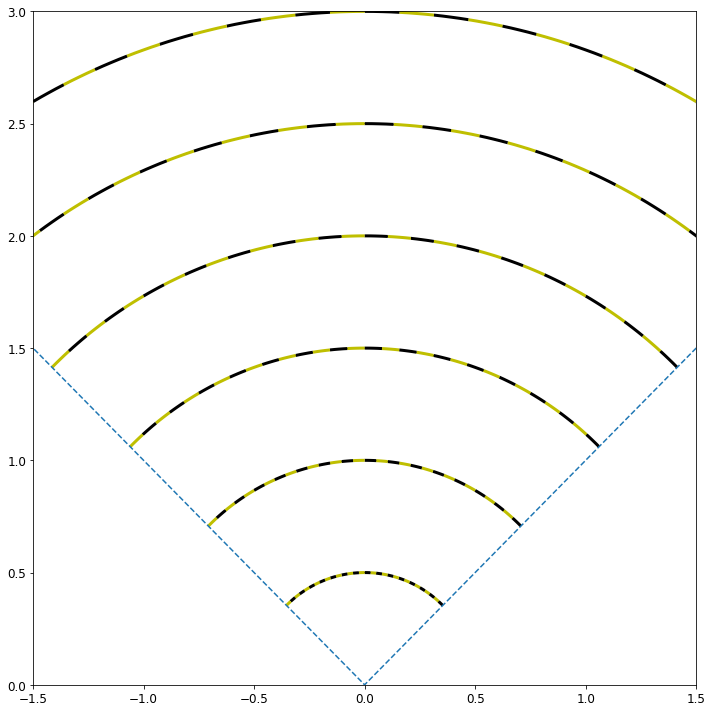

In [27]:
detGeo_up = simpleDetectorGeo(rDet)
detGeo_up.makeTower(np.pi/2,  np.pi/2, nSS=nSSperLayer)

fig, ax = plt.subplots(1, figsize=(10,10))
ax.set_xlim((-1.5, 1.5))
ax.set_ylim((0, 3))

detGeo_up.drawTower(ax,detailed=True)
save_fig("SymmetricTowerUp")

In [28]:
#np.random.seed(24)
recHits_up, eventTruth_up, eventPartilces_up, solutions_up = getEvent(10, np.pi/2, np.pi/4, detGeo_up)
recHits_up[0:10] 

/Users/johnda/MachineLearning/TrackingToy/simpleLayer.py:79: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_pp = abs(yints_raw-trk_yc+np.sqrt(trk_rc2-(xints_p_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/simpleLayer.py:80: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_pm = abs(yints_raw-trk_yc-np.sqrt(trk_rc2-(xints_p_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/simpleLayer.py:81: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_mp = abs(yints_raw-trk_yc+np.sqrt(trk_rc2-(xints_m_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/simpleLayer.py:82: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_mm = abs(yints_raw-trk_yc-np.sqrt(trk_rc2-(xints_m_raw-trk_xc)**2))


array([[ 4.        , -1.4081372 ,  2.06570802,  4.        ],
       [37.        ,  0.35961439,  0.93310101,  1.        ],
       [10.        ,  1.05600451,  2.26602173,  4.        ],
       [ 0.        , -0.1958094 ,  0.46006378,  0.        ],
       [35.        ,  0.89834989,  2.86233602,  5.        ],
       [32.        ,  0.34009533,  1.4609364 ,  2.        ],
       [28.        , -0.8430343 ,  2.3535703 ,  4.        ],
       [12.        ,  0.18019751,  0.46639989,  0.        ],
       [23.        ,  0.0515491 ,  2.99955708,  5.        ],
       [29.        , -0.9974406 ,  2.82933071,  5.        ]])

[[-0.19580939577813397, -0.4357794991824901, -0.7186751484588598, -1.0432314866085641, -1.4081372028733161, -1.8120152391004418], [0.4600637787579045, 0.9000534584635838, 1.3166267622176133, 1.7063610594913625, 2.065708018545727, 2.390941398961457], 5.167300173110817, 1.9247865152661996, -1]
[[0.011051008715306374, 0.12093919294813607, 0.3308293655277489, 0.6420119121415429, 1.0560045145008186, 1.574726943469289], [0.49987786028826503, 0.9926599173982263, 1.4630625177703471, 1.8941543508036403, 2.2660217265846967, 2.5534750935757864], 2.5507042370923476, 1.6468622629708203, 1]
Saving figure SymmetricTowerWithOneTrack


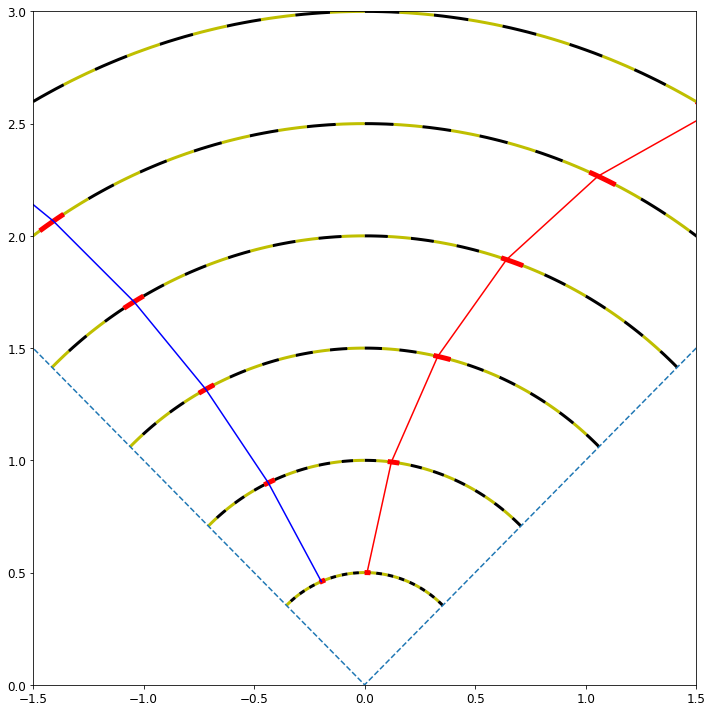

In [29]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.set_ylim((0, 3))
ax.set_xlim((-1.5, 1.5))


detGeo_up.drawTower(ax,detailed=True)
for sItr in range(2):
    s = solutions_up[sItr]
    print(s)
    hitListTrk = []
    for hItr in range(len(s[0])):
        # Layer / hit-X / hit-Y
        hitListTrk  .append([1,s[0][hItr],s[1][hItr],hItr])

    if not detGeo_up.hitsAllInTower(hitListTrk): continue

        
    color = "b" if (s[4] < 0) else "r"
    plt.plot(s[0],s[1],color)
    
    hitsWithSSIDs = detGeo_up.addSSIDs(hitListTrk)

    thisSSIDs = np.array(hitsWithSSIDs)
    thisSSIDs = np.delete(thisSSIDs,0,axis=1)
    thisSSIDs = np.delete(thisSSIDs,0,axis=1)  
    thisSSIDs = np.delete(thisSSIDs,0,axis=1)      

    detGeo_up.drawSSIDs(ax,thisSSIDs)
    
save_fig("SymmetricTowerWithOneTrack")

In [30]:
#print(recHits_up)
#print(eventHits_up)
hitsAndSSIDS_up = detGeo_up.addSSIDs(recHits_up)
detGeo_up.DOWrite(hitsAndSSIDS_up)

In [31]:
patterns = patternBank.keys()
matchedPatterns_up = []
for p in patterns:

    if detGeo_up.isPatternFired(p): 
        matchedPatterns_up.append(p)

print(matchedPatterns_up)

[272625242322.0, 50606070708.0, 90808070707.0, 90808080707.0, 90908080707.0, 212121212122.0, 212121212121.0, 40608101214.0, 90910101111.0, 103050608.0, 50606070707.0, 272625242321.0, 80910101111.0, 141312121110.0, 80808080707.0, 80808070707.0, 141312121111.0, 103050708.0, 50608101214.0]


Saving figure MatchedPatternsPhi0p5Pi


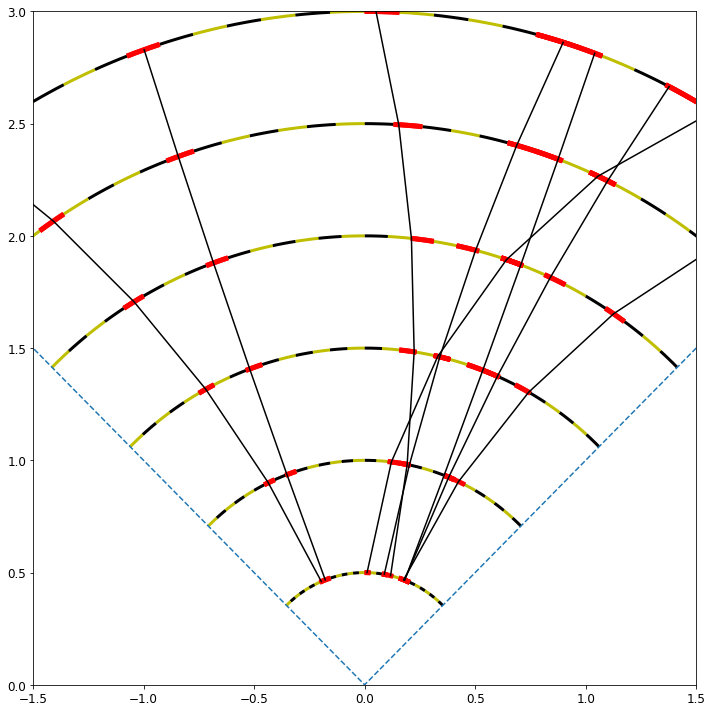

In [32]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.set_ylim((0, 3))
ax.set_xlim((-1.5, 1.5))


detGeo_up.drawTower(ax,detailed=True)
for mp in matchedPatterns_up:
    thisSSIDs = getSSIDS(mp)
    detGeo_up.drawSSIDs(ax,thisSSIDs)
    
for sItr in range(len(solutions_up)):
    s = solutions_up[sItr]

    color = "k"
    plt.plot(s[0],s[1],color)
save_fig("MatchedPatternsPhi0p5Pi")

In [33]:
solns_up, _  = detGeo_up.getSolutions(matchedPatterns_up)
solns_up.head()

event_id  hit_id  track_id
0         0     0.0         1
1         0     1.0         1
2         0     2.0         1
3         0     3.0         1
4         0     4.0         1

In [34]:
truth_up = getTruthDF(eventTruth_up)
truth_up.head()

hit_id  particle_id  weight
0     0.0          1.0     1.0
1     1.0          1.0     1.0
2     2.0          1.0     1.0
3     3.0          1.0     1.0
4     4.0          1.0     1.0

In [35]:
score.score_event(truth_up,solns_up)

0.7083333333333333

OK seems to be working ...

# Lets try 3pi/2

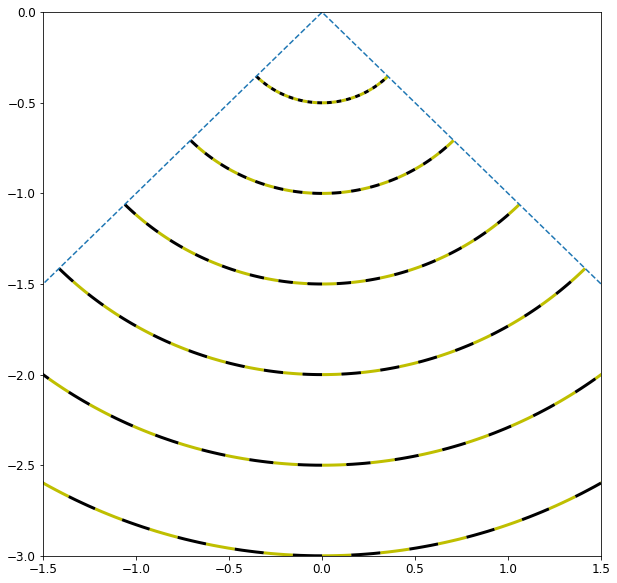

In [36]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.set_xlim((-1.5, 1.5))
ax.set_ylim((-3, 0))

detGeo_down = simpleDetectorGeo(rDet)
detGeo_down.makeTower(-1*np.pi/2,  np.pi/2, nSS=nSSperLayer)
detGeo_down.drawTower(ax,detailed=True)

In [37]:

recHits_down, eventTruth_down, eventPartilces_down, solutions_down = getEvent(10, -1*np.pi/2, np.pi/4, detGeo_down)
recHits_down[0:10] 

/Users/johnda/MachineLearning/TrackingToy/simpleLayer.py:81: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_mp = abs(yints_raw-trk_yc+np.sqrt(trk_rc2-(xints_m_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/simpleLayer.py:82: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_mm = abs(yints_raw-trk_yc-np.sqrt(trk_rc2-(xints_m_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/simpleLayer.py:79: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_pp = abs(yints_raw-trk_yc+np.sqrt(trk_rc2-(xints_p_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/simpleLayer.py:80: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_pm = abs(yints_raw-trk_yc-np.sqrt(trk_rc2-(xints_p_raw-trk_xc)**2))


array([[ 4.        ,  1.4081372 , -2.06570802,  4.        ],
       [37.        , -0.35961439, -0.93310101,  1.        ],
       [10.        , -1.05600451, -2.26602173,  4.        ],
       [ 0.        ,  0.1958094 , -0.46006378,  0.        ],
       [35.        , -0.89834989, -2.86233602,  5.        ],
       [32.        , -0.34009533, -1.4609364 ,  2.        ],
       [28.        ,  0.8430343 , -2.3535703 ,  4.        ],
       [12.        , -0.18019751, -0.46639989,  0.        ],
       [23.        , -0.0515491 , -2.99955708,  5.        ],
       [29.        ,  0.9974406 , -2.82933071,  5.        ]])

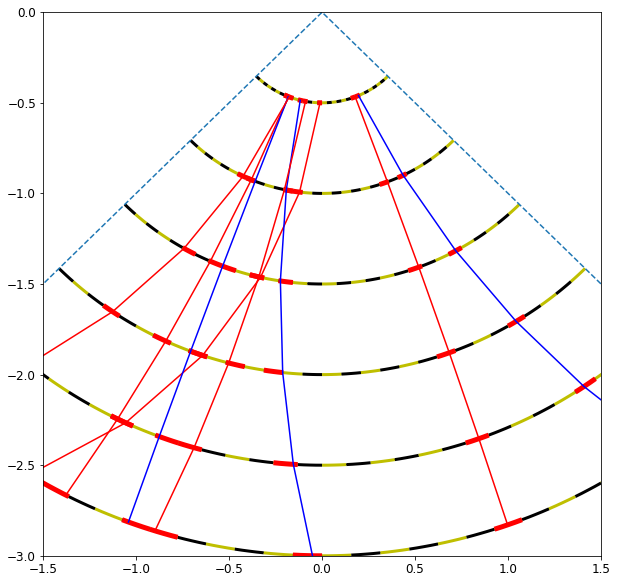

In [38]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.set_ylim((-3, 0))
ax.set_xlim((-1.5, 1.5))


detGeo_down.drawTower(ax,detailed=True)
for sItr in range(len(solutions_down)):
    s = solutions_down[sItr]

    hitListTrk = []
    for hItr in range(len(s[0])):
        # Layer / hit-X / hit-Y
        hitListTrk  .append([1,s[0][hItr],s[1][hItr],hItr])

    color = "b" if (s[4] < 0) else "r"
    plt.plot(s[0],s[1],color)
    
    hitsWithSSIDs = detGeo_down.addSSIDs(hitListTrk)

    thisSSIDs = np.array(hitsWithSSIDs)
    thisSSIDs = np.delete(thisSSIDs,0,axis=1)
    thisSSIDs = np.delete(thisSSIDs,0,axis=1)  
    thisSSIDs = np.delete(thisSSIDs,0,axis=1)      

    detGeo_down.drawSSIDs(ax,thisSSIDs)

In [39]:
hitsAndSSIDS_down = detGeo_down.addSSIDs(recHits_down)
detGeo_down.DOWrite(hitsAndSSIDS_down)

In [40]:
patterns = patternBank.keys()
matchedPatterns_down = []
for p in patterns:

    if detGeo_down.isPatternFired(p): 
        matchedPatterns_down.append(p)

print(matchedPatterns_down)

[272625242322.0, 50606070708.0, 90808070707.0, 90808080707.0, 90908080707.0, 212121212122.0, 212121212121.0, 40608101214.0, 90910101111.0, 103050608.0, 50606070707.0, 272625242321.0, 80910101111.0, 141312121110.0, 80808080707.0, 80808070707.0, 141312121111.0, 103050708.0, 50608101214.0]


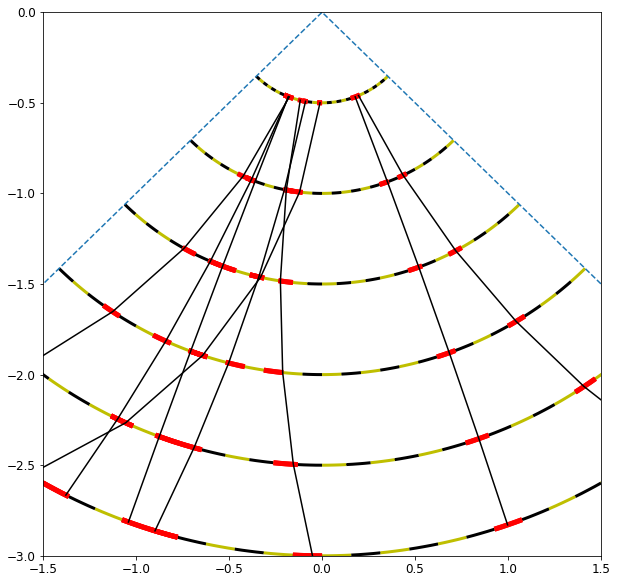

In [41]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.set_ylim((-3, 0))
ax.set_xlim((-1.5, 1.5))


detGeo_down.drawTower(ax,detailed=True)
for mp in matchedPatterns_down:
    thisSSIDs = getSSIDS(mp)
    detGeo_down.drawSSIDs(ax,thisSSIDs)
    
for sItr in range(len(solutions_down)):
    s = solutions_down[sItr]

    color = "k"
    plt.plot(s[0],s[1],color)

In [42]:
solns_down, _ = detGeo_down.getSolutions(matchedPatterns_down)
truth_down = getTruthDF(eventTruth_down)
score.score_event(truth_down,solns_down)

0.7083333333333333

# OK pretty clear differnet regions are working, lets to the whole event

Get full event

/Users/johnda/MachineLearning/TrackingToy/simpleLayer.py:79: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_pp = abs(yints_raw-trk_yc+np.sqrt(trk_rc2-(xints_p_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/simpleLayer.py:80: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_pm = abs(yints_raw-trk_yc-np.sqrt(trk_rc2-(xints_p_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/simpleLayer.py:81: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_mp = abs(yints_raw-trk_yc+np.sqrt(trk_rc2-(xints_m_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/simpleLayer.py:82: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_mm = abs(yints_raw-trk_yc-np.sqrt(trk_rc2-(xints_m_raw-trk_xc)**2))


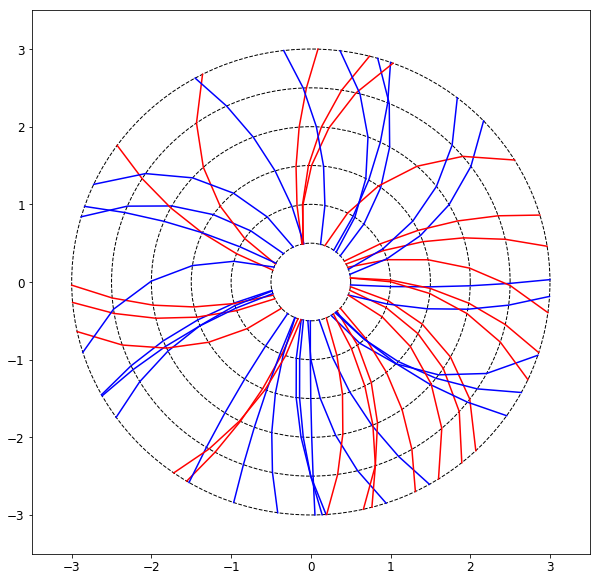

In [43]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.set_xlim((-3.5, 3.5))
ax.set_ylim((-3.5, 3.5))

detGeo_All = simpleDetectorGeo(rDet)
detGeo_All.makeTower(0,  2*np.pi, nSS=nSSperLayer)

detGeo_All.drawDetector(ax)

recHits_All, eventTruth_All, eventPartilces_All, solutions_All = getEvent(50, 0, 2*np.pi, detGeo_All,randSeed=2)


for sItr in range(len(solutions_All)):
    s = solutions_All[sItr]
    
    hitListTrk = []
    for hItr in range(len(s[0])):
        # Layer / hit-X / hit-Y
        hitListTrk  .append([1,s[0][hItr],s[1][hItr],hItr])

    color = "b" if (s[4] < 0) else "r"
    plt.plot(s[0],s[1],color)
    
    

Make towers

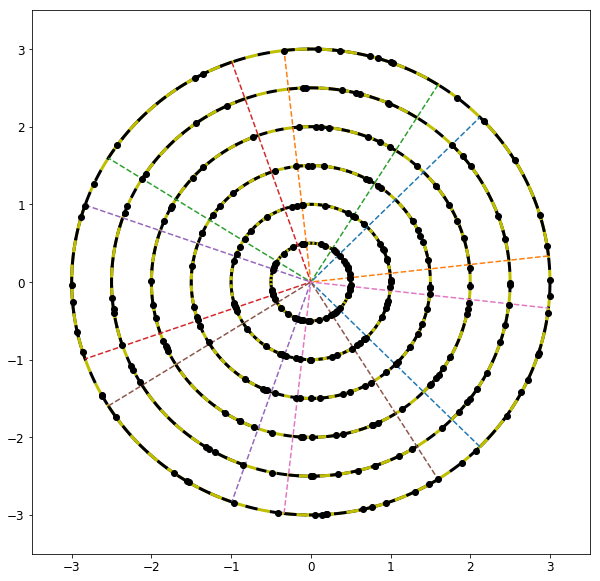

In [44]:

fig, ax = plt.subplots(1, figsize=(10,10))
ax.set_xlim((-3.5, 3.5))
ax.set_ylim((-3.5, 3.5))
nTowers = 7
towerWidth = np.pi/2

towers = []
for iT in range(nTowers):
    towers.append(simpleDetectorGeo(rDet))
    towers[-1].makeTower(2*iT*np.pi/nTowers, towerWidth, nSS=nSSperLayer)

    towers[-1].drawTower(ax,detailed=True)

for sItr in range(50):
    s = solutions_All[sItr]

    color = "b" if (s[4] < 0) else "r"
    plt.plot(s[0],s[1],"ko")
    

How many tracks are not contained in at least one tower ?

In [45]:
nTowersContained = []

for sItr in range(len(solutions_All)):
    s = solutions_All[sItr]
    
    nTowersContained.append(0)

    xHits = s[0]
    yHits = s[1]
    
    hitList = []
    for hItr in range(len(xHits)):
        # Layer / hit-X / hit-Y
        hitList.append((hItr,xHits[hItr],yHits[hItr]))
            
    for t in towers:
        if t.hitsAllInTower(hitList): 
            nTowersContained[-1] += 1

            
print(nTowersContained)
print("frac 0:",nTowersContained.count(0)/len(nTowersContained))
print("frac 1:",nTowersContained.count(1)/len(nTowersContained))
print("frac 2:",nTowersContained.count(2)/len(nTowersContained))

[1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1]
frac 0: 0.0
frac 1: 0.84
frac 2: 0.16


OK tower sizes seem reasonable. Lets process the event

In [46]:
import pandas as pd

evt_id_all = []
hit_id_all = []
trk_id_all = []

patterns = patternBank.keys()

for t in towers:
    hitsAndSSIDS_All = t.addSSIDs(recHits_All,filterOnTower=True)
    t.DOWrite(hitsAndSSIDS_All)


    thisMatchedPatterns = []
    for p in patterns:

        if t.isPatternFired(p): 
            thisMatchedPatterns.append(p)
    
    if len(trk_id_all): trkID = trk_id_all[-1]+1
    else:               trkID = 0
    
    thisSolns, thisSolnsDetails = t.getSolutions(thisMatchedPatterns,trkIDInit=trkID)
    
    # need over lap removal!
    
    evt_id_all += thisSolnsDetails[0]
    hit_id_all += thisSolnsDetails[1]
    trk_id_all += thisSolnsDetails[2]    

solnDictAll = {"event_id" : pd.Series(evt_id_all),
               "hit_id" : pd.Series(hit_id_all),
               "track_id" : pd.Series(trk_id_all),
              }

solnsAll = pd.DataFrame(solnDictAll)
#solnsAll
#print(hit_id_all)

In [47]:

truth_All = getTruthDF(eventTruth_All)
score.score_event(truth_All,solnsAll)
    

0.7200000000000001

Still need to do overlap removal.  Leave this for now... on to FTK with modules

In [48]:
# Need to remove overlap ?
solns["hit_id"].value_counts()

23.0    1
26.0    1
35.0    1
40.0    1
39.0    1
9.0     1
36.0    1
12.0    1
17.0    1
16.0    1
10.0    1
15.0    1
14.0    1
13.0    1
37.0    1
42.0    1
5.0     1
4.0     1
3.0     1
2.0     1
1.0     1
25.0    1
27.0    1
22.0    1
28.0    1
21.0    1
20.0    1
18.0    1
47.0    1
46.0    1
45.0    1
44.0    1
43.0    1
34.0    1
33.0    1
19.0    1
31.0    1
30.0    1
11.0    1
8.0     1
32.0    1
7.0     1
6.0     1
29.0    1
0.0     1
Name: hit_id, dtype: int64